## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy import stats

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, on = 'Mouse ID', how = 'outer')
# Display the data table for preview
combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_df['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df_1 = combined_df[['Mouse ID','Timepoint']]
duplicated_rows = duplicate_df_1[duplicate_df_1.duplicated()]
duplicated_rows

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_df.loc[combined_df['Mouse ID'] =='g989', :]
duplicate_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df[combined_df['Mouse ID'] != 'g989']
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_df = combined_df.groupby(['Drug Regimen']).mean()
mean = (mean_df['Tumor Volume (mm3)'])
median_df = combined_df.groupby(['Drug Regimen']).median()
median = (median_df['Tumor Volume (mm3)'])
variance_df = combined_df.groupby(['Drug Regimen']).var()
variance = variance_df['Tumor Volume (mm3)']
std_df = combined_df.groupby(['Drug Regimen']).std()
std = std_df['Tumor Volume (mm3)']
sem_df = combined_df.groupby(['Drug Regimen']).sem()

sem = sem_df['Tumor Volume (mm3)']
summary_df = pd.DataFrame({'Mean (mm3) ':mean, 
                           'Median (mm3)':median, 
                           'Variance (mm3)':variance, 
                           'Standard Deviation (mm3)':std,
                           'SEM (mm3)':sem})
summary_df

,Mean (mm3),Median (mm3),Variance (mm3),Standard Deviation (mm3),SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
mean_df = combined_df.groupby(['Drug Regimen']).mean()
mean = (mean_df['Tumor Volume (mm3)'])
median_df = combined_df.groupby(['Drug Regimen']).median()
median = (median_df['Tumor Volume (mm3)'])
variance_df = combined_df.groupby(['Drug Regimen']).var()
variance = variance_df['Tumor Volume (mm3)']
std_df = combined_df.groupby(['Drug Regimen']).std()
std = std_df['Tumor Volume (mm3)']
sem_df = combined_df.groupby(['Drug Regimen']).sem()

sem = sem_df['Tumor Volume (mm3)']
summary_df = pd.DataFrame({'Mean (mm3) ':mean, 
                           'Median (mm3)':median, 
                           'Variance (mm3)':variance, 
                           'Standard Deviation (mm3)':std,
                           'SEM (mm3)':sem})
summary_df

,Mean (mm3),Median (mm3),Variance (mm3),Standard Deviation (mm3),SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

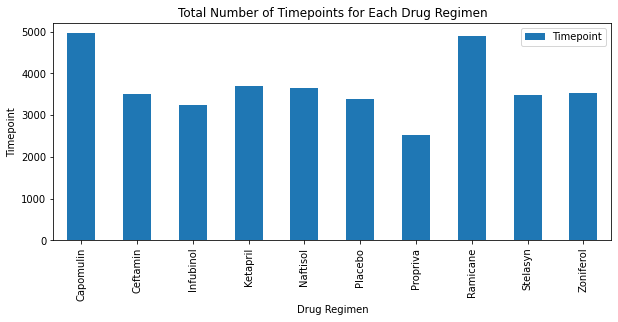

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_df = cleaned_df[['Drug Regimen','Timepoint']]
timepoint_df = timepoint_df.groupby('Drug Regimen').sum()
timepoint_df.plot(kind ="bar",figsize = (10,4))
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.ylabel('Timepoint')
plt.show()

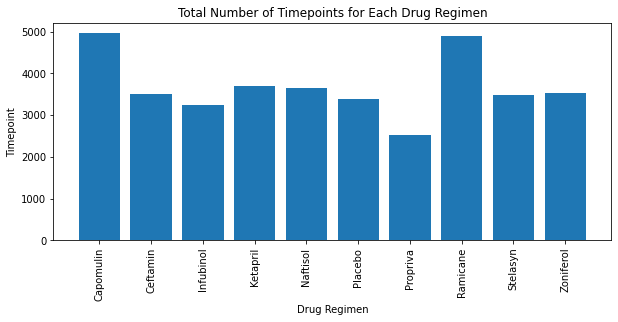

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_df = timepoint_df.reset_index()
x_axis = np.arange(len(timepoint_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,4))
plt.xticks(tick_locations, timepoint_df['Drug Regimen'], rotation = 'vertical')
plt.bar(x_axis, timepoint_df['Timepoint'])
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint')
plt.show()

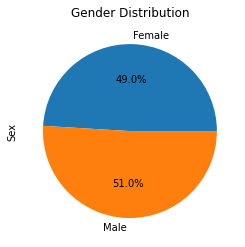

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = cleaned_df.groupby(['Sex'])
gender_df = gender_df ['Sex'].count()
gender_df
gender_pie = gender_df.plot(kind='pie',y='Sex',title='Gender Distribution',autopct='%1.1f%%')

Text(0, 0.5, 'Sex')

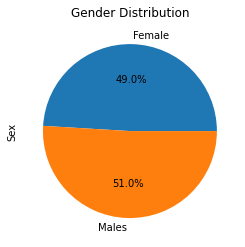

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Males']
population = list(gender_df)
plt.pie(population, labels = labels, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatment_df = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin') | 
                                   (cleaned_df['Drug Regimen'] == 'Ramicane') | 
                                   (cleaned_df['Drug Regimen'] == 'Infubinol') | 
                                   (cleaned_df['Drug Regimen'] == 'Ceftamin'), ['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]


# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
four_treatment_df = four_treatment_df.drop_duplicates(subset=['Mouse ID'], keep='last')
four_treatment_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,45,22.050126
19,s185,Capomulin,45,23.343598
29,x401,Capomulin,45,28.484033
39,m601,Capomulin,45,28.430964
49,g791,Ramicane,45,29.128472
...,...,...,...,...
1797,x822,Ceftamin,45,61.386660
1813,y163,Infubinol,45,67.685569
1845,y769,Ceftamin,45,68.594745
1855,y865,Ceftamin,45,64.729837


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_capomulin = four_treatment_df.loc[four_treatment_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']
tumor_vol_ramicane = four_treatment_df.loc[four_treatment_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']
tumor_vol_infubinol = four_treatment_df.loc[four_treatment_df['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)']
tumor_vol_cerftamin = four_treatment_df.loc[four_treatment_df['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)']

quartiles_capomulin = tumor_vol_capomulin.quantile([0.25,0.5,0.75])
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin - lowerq_capomulin
lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)
outliers_capomulin = [value for value in tumor_vol_capomulin if value < lower_bound_capomulin or value > upper_bound_capomulin]

quartiles_ramicane = tumor_vol_ramicane.quantile([0.25,0.5,0.75])
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane - lowerq_ramicane
lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)
outliers_ramicane = [value for value in tumor_vol_ramicane if value > upper_bound_ramicane]

quartiles_infubinol = tumor_vol_infubinol.quantile([0.25,0.5,0.75])
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol - lowerq_infubinol
lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)
outliers_infubinol = [value for value in tumor_vol_infubinol if value < lower_bound_infubinol or value > upper_bound_infubinol]

quartiles_cerftamin = tumor_vol_cerftamin.quantile([0.25,0.5,0.75])
lowerq_cerftamin = quartiles_cerftamin[0.25]
upperq_cerftamin = quartiles_cerftamin[0.75]
iqr_cerftamin = upperq_cerftamin - lowerq_cerftamin
lower_bound_cerftamin = lowerq_cerftamin - (1.5*iqr_cerftamin)
upper_bound_cerftamin = upperq_cerftamin + (1.5*iqr_cerftamin)
outliers_cerftamin = [value for value in tumor_vol_cerftamin if value < lower_bound_cerftamin or value > upper_bound_cerftamin]

print(f' The upper and lower bond tumor volume for Capomulin treatment is {upper_bound_capomulin} , {lower_bound_capomulin}, outliers are {outliers_capomulin}')
print(f' The upper and lower bond tumor volume for Ramicane treatment is {upper_bound_ramicane} , {lower_bound_ramicane}, outliers are {outliers_ramicane}')
print(f' The upper and lower bond tumor volume for Infubinol treatment is {upper_bound_infubinol} , {lower_bound_infubinol}, outliers are {outliers_infubinol}')
print(f' The upper and lower bond tumor volume for Cerftamin treatment is {upper_bound_cerftamin} , {lower_bound_cerftamin}, outliers are {outliers_cerftamin}')

 The upper and lower bond tumor volume for Capomulin treatment is 51.83201549 , 20.70456164999999, outliers are []
 The upper and lower bond tumor volume for Ramicane treatment is 54.30681135 , 17.912664470000003, outliers are []
 The upper and lower bond tumor volume for Infubinol treatment is 82.74144559000001 , 36.83290494999999, outliers are [36.3213458]
 The upper and lower bond tumor volume for Cerftamin treatment is 87.66645829999999 , 25.355449580000002, outliers are []


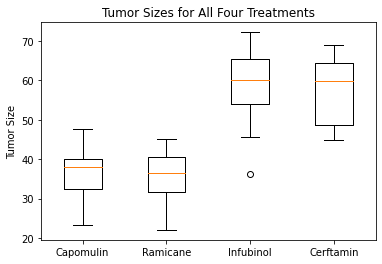

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,ax1 = plt.subplots()
plt.boxplot([tumor_vol_capomulin,tumor_vol_ramicane,tumor_vol_infubinol,tumor_vol_cerftamin])
ax1.set_title('Tumor Sizes for All Four Treatments')
x_axis = np.arange(len(treatments))
tick_locations = [value+1 for value in x_axis]
green_diamond = dict(markerfacecolor = 'g', marker = 'D')
plt.xticks(tick_locations, ['Capomulin','Ramicane','Infubinol','Cerftamin'])
ax1.set_ylabel('Tumor Size')

plt.show()


## Line and Scatter Plots

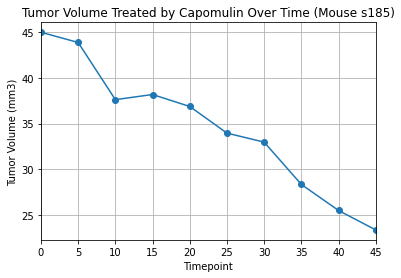

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
single_mouse_df = cleaned_df.loc[cleaned_df['Mouse ID'] == 's185',:]
tumor_volume = single_mouse_df ['Timepoint']
timepoint = single_mouse_df ['Tumor Volume (mm3)']
plt.plot(tumor_volume, timepoint, marker = 'o')
plt.title('Tumor Volume Treated by Capomulin Over Time (Mouse s185)')
plt.xlim(0,45)
plt.grid()
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

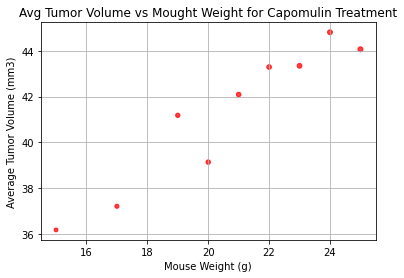

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin', :]
weights = capomulin_df ['Weight (g)'].value_counts()
weights = [15,17,19,20,21,22,23,24,25]
avg_15 = capomulin_df.loc[capomulin_df['Weight (g)'] == 15, ['Tumor Volume (mm3)']].mean()
avg_17 = capomulin_df.loc[capomulin_df['Weight (g)'] == 17, ['Tumor Volume (mm3)']].mean()
avg_19 = capomulin_df.loc[capomulin_df['Weight (g)'] == 19, ['Tumor Volume (mm3)']].mean()
avg_20 = capomulin_df.loc[capomulin_df['Weight (g)'] == 20, ['Tumor Volume (mm3)']].mean()
avg_21 = capomulin_df.loc[capomulin_df['Weight (g)'] == 21, ['Tumor Volume (mm3)']].mean()
avg_22 = capomulin_df.loc[capomulin_df['Weight (g)'] == 22, ['Tumor Volume (mm3)']].mean()
avg_23 = capomulin_df.loc[capomulin_df['Weight (g)'] == 23, ['Tumor Volume (mm3)']].mean()
avg_24 = capomulin_df.loc[capomulin_df['Weight (g)'] == 24, ['Tumor Volume (mm3)']].mean()
avg_25 = capomulin_df.loc[capomulin_df['Weight (g)'] == 25, ['Tumor Volume (mm3)']].mean()
avg_tumor_sizes = [avg_15,avg_17,avg_19,avg_20,avg_21,avg_22,avg_23,avg_24,avg_25]

plt.scatter(weights, avg_tumor_sizes,marker = 'o', facecolors = 'r',s=weights, alpha = 0.75)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Avg Tumor Volume vs Mought Weight for Capomulin Treatment')
plt.grid()
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weights,avg_tumor_sizes)
x_values = weights
y_values = avg_tumor_sizes
slope,intercept,r_values,pvalue,stderr = stats.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(weights, regress_values,'--')
plt.xticks('Weights')
plt.ylabel('Tumor Vol')
plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 9 and the array at index 1 has size 1